<a href="https://colab.research.google.com/github/prashanth-kumar-veeraboina/prashanth/blob/master/loan_prediction22.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Project Title:
# `Marketing Campaign for Banking Products`
  #prashanth 

**bold text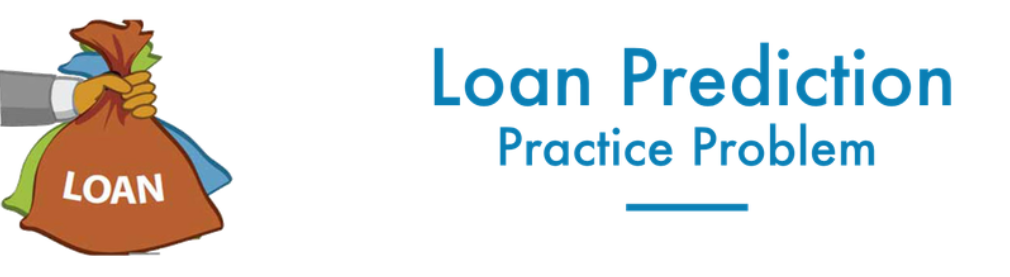**

Data Description:
The file Bank.xls contains data on 5000 customers. The data include customer
demographic information (age, income, etc.), the customer's relationship with the bank
(mortgage, securities account, etc.), and the customer response to the last personal
loan campaign (Personal Loan).
Among these 5000 customers, only 480 (= 9.6%) accepted the personal loan that was
offered to them in the earlier campaign.

dataset link:
Data: https://www.kaggle.com/itsmesunil/bank-loan-modelling/download[link text](https://)

# Objective:
### The classification goal is to predict the likelihood of a liability customer buying personal loans


Attribute Information:
● ID: Customer id

● Age: Customer's age in completed years

● Experience: #years of professional experience

● Income: Annual income of the customer ($000)

● ZIP Code: Home Address ZIP code.

● Family: Family size of the customer

● CCAvg: Avg. spending on credit cards per month ($000)

● Education: Education Level. 1: Undergrad; 2: Graduate; 3:
Advanced/Professional

● Mortgage: Value of house mortgage if any. ($000)

● Personal Loan: Did this customer accept the personal loan offered in the last
campaign?

● Securities Account: Does the customer have a securities account with the bank?

● CD Account: Does the customer have a certificate of deposit (CD) account with
the bank?

● Online: Does the customer use internet banking facilities?

● Credit card: Does the customer use a credit card issued by the bank?

# step1)Import the datasets and libraries, check datatype, statistical summary, shape, null values etc


## importing required libraries for **EDA**





In [1]:
import numpy as np       # numerical calculations
import pandas as pd      # for dataframes
import matplotlib.pyplot as plt  #for plotting graph
import scipy
import seaborn as sns# for data visualizations
%matplotlib inline
import warnings 
warnings.filterwarnings("ignore")#ignoring warnings

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


# uploading the datset file from our desktop

In [2]:
from google.colab import files
uploaded=files.upload()

Saving Bank_Personal_Loan_Modelling.csv to Bank_Personal_Loan_Modelling.csv


# reading the datasets using pandas dataframes.

In [3]:


df=pd.read_csv('Bank_Personal_Loan_Modelling.csv')



# df.shape 

# shows the number of rows and columns in a data

In [4]:
df.shape

(5000, 14)

##info() 
 Prints a concise summary of a DataFrame. This method prints information about a DataFrame including the index dtype and columns, non-null values and memory usage

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  5000 non-null   int64  
 1   Age                 5000 non-null   int64  
 2   Experience          5000 non-null   int64  
 3   Income              5000 non-null   int64  
 4   ZIP Code            5000 non-null   int64  
 5   Family              5000 non-null   int64  
 6   CCAvg               5000 non-null   float64
 7   Education           5000 non-null   int64  
 8   Mortgage            5000 non-null   int64  
 9   Personal Loan       5000 non-null   int64  
 10  Securities Account  5000 non-null   int64  
 11  CD Account          5000 non-null   int64  
 12  Online              5000 non-null   int64  
 13  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


##head(n)
Pandas head() method is used to return top n (5 by default) rows of a data frame or series.

In [6]:
df.head(10)

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1
5,6,37,13,29,92121,4,0.4,2,155,0,0,0,1,0
6,7,53,27,72,91711,2,1.5,2,0,0,0,0,1,0
7,8,50,24,22,93943,1,0.3,3,0,0,0,0,0,1
8,9,35,10,81,90089,3,0.6,2,104,0,0,0,1,0
9,10,34,9,180,93023,1,8.9,3,0,1,0,0,0,0


##df.tail(n)
This function returns last n rows from the object based on position

In [7]:
df.tail(10)

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
4990,4991,55,25,58,95023,4,2.00,3,219,0,0,0,0,1
4991,4992,51,25,92,91330,1,1.90,2,100,0,0,0,0,1
4992,4993,30,5,13,90037,4,0.50,3,0,0,0,0,0,0
4993,4994,45,21,218,91801,2,6.67,1,0,0,0,0,1,0
4994,4995,64,40,75,94588,3,2.00,3,0,0,0,0,1,0
4995,4996,29,3,40,92697,1,1.90,3,0,0,0,0,1,0
4996,4997,30,4,15,92037,4,0.40,1,85,0,0,0,1,0
4997,4998,63,39,24,93023,2,0.30,3,0,0,0,0,0,0
4998,4999,65,40,49,90034,3,0.50,2,0,0,0,0,1,0
4999,5000,28,4,83,92612,3,0.80,1,0,0,0,0,1,1


# is null() 
   Detect missing values for an array-like object. This function takes a scalar or array-like object and indicates whether values are missing ( NaN in numeric arrays, None or NaN in object arrays, NaT in datetimelike)

In [8]:
df.isnull().sum()

ID                    0
Age                   0
Experience            0
Income                0
ZIP Code              0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Personal Loan         0
Securities Account    0
CD Account            0
Online                0
CreditCard            0
dtype: int64

##Pandas describe()
 is used to view some basic statistical details like percentile, mean, std etc. of a data frame or a series of numeric values.

In [9]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
ID,5000.0,2500.500000,1443.520003,1.0,1250.75,2500.5,3750.25,5000.0
Age,5000.0,45.338400,11.463166,23.0,35.00,45.0,55.00,67.0
Experience,5000.0,20.104600,11.467954,-3.0,10.00,20.0,30.00,43.0
Income,5000.0,73.774200,46.033729,8.0,39.00,64.0,98.00,224.0
ZIP Code,5000.0,93152.503000,2121.852197,9307.0,91911.00,93437.0,94608.00,96651.0
Family,5000.0,2.396400,1.147663,1.0,1.00,2.0,3.00,4.0
CCAvg,5000.0,1.937938,1.747659,0.0,0.70,1.5,2.50,10.0
Education,5000.0,1.881000,0.839869,1.0,1.00,2.0,3.00,3.0
Mortgage,5000.0,56.498800,101.713802,0.0,0.00,0.0,101.00,635.0
Personal Loan,5000.0,0.096000,0.294621,0.0,0.00,0.0,0.00,1.0


# step 2) cleaning data 

# the above description gives the statstical details. from the above information we observed that experience have a negative value(-3). which is an data error.
# in order to avoid it following steps are used.

##a)finding no of values of experience in negative

In [10]:
negExp = df.Experience < 0
negExp.value_counts()

False    4948
True       52
Name: Experience, dtype: int64

the count gives 52 negative experience values
# b)getting ids of negative experiences

In [11]:
dfExp = df.loc[df['Experience'] >0]
mylist = df.loc[negExp]['ID'].tolist()
mylist

[90,
 227,
 316,
 452,
 525,
 537,
 541,
 577,
 584,
 598,
 650,
 671,
 687,
 794,
 890,
 910,
 1174,
 1429,
 1523,
 1906,
 2103,
 2431,
 2467,
 2546,
 2619,
 2718,
 2849,
 2877,
 2963,
 2981,
 3077,
 3131,
 3158,
 3280,
 3285,
 3293,
 3395,
 3426,
 3627,
 3797,
 3825,
 3888,
 3947,
 4016,
 4089,
 4117,
 4286,
 4412,
 4482,
 4515,
 4583,
 4958]




* For the record with the ID, get the value of Age column  
*   For the record with the ID, get the value of Education column

*  Filter the records matching the above criteria from the data frame which has records with positive experience and take the median 
*   Apply the median back to the location which had negative experience







In [12]:
for id in mylist:
    age = df.loc[np.where(df['ID']==id)]["Age"].tolist()[0]
    education = df.loc[np.where(df['ID']==id)]["Education"].tolist()[0]
    df_filtered = dfExp[(dfExp.Age == age) & (dfExp.Education == education)]
    exp = df_filtered['Experience'].median()
    df.loc[df.loc[np.where(df['ID']==id)].index, 'Experience'] = exp

In [13]:
df[df['Experience'] < 0]['Experience'].count()# checking negative indexes after removal 

0

[link text](https://)as the id shows no signficance of loan we drop id column


In [14]:
df=df.drop('ID',axis=1)

# step 3) EDA: Study the data distribution in each attribute and target variable.


# Pandas Index.unique() 
function return unique values in the index

In [15]:
df.apply(lambda x: len(x.unique()))

Age                    45
Experience             45
Income                162
ZIP Code              467
Family                  4
CCAvg                 108
Education               3
Mortgage              347
Personal Loan           2
Securities Account      2
CD Account              2
Online                  2
CreditCard              2
dtype: int64

here zipcode has 467 unique values.it is a nominal variable which has too many variables.its better we drop this variable...
 

In [16]:
df=df.drop('ZIP Code',axis=1)

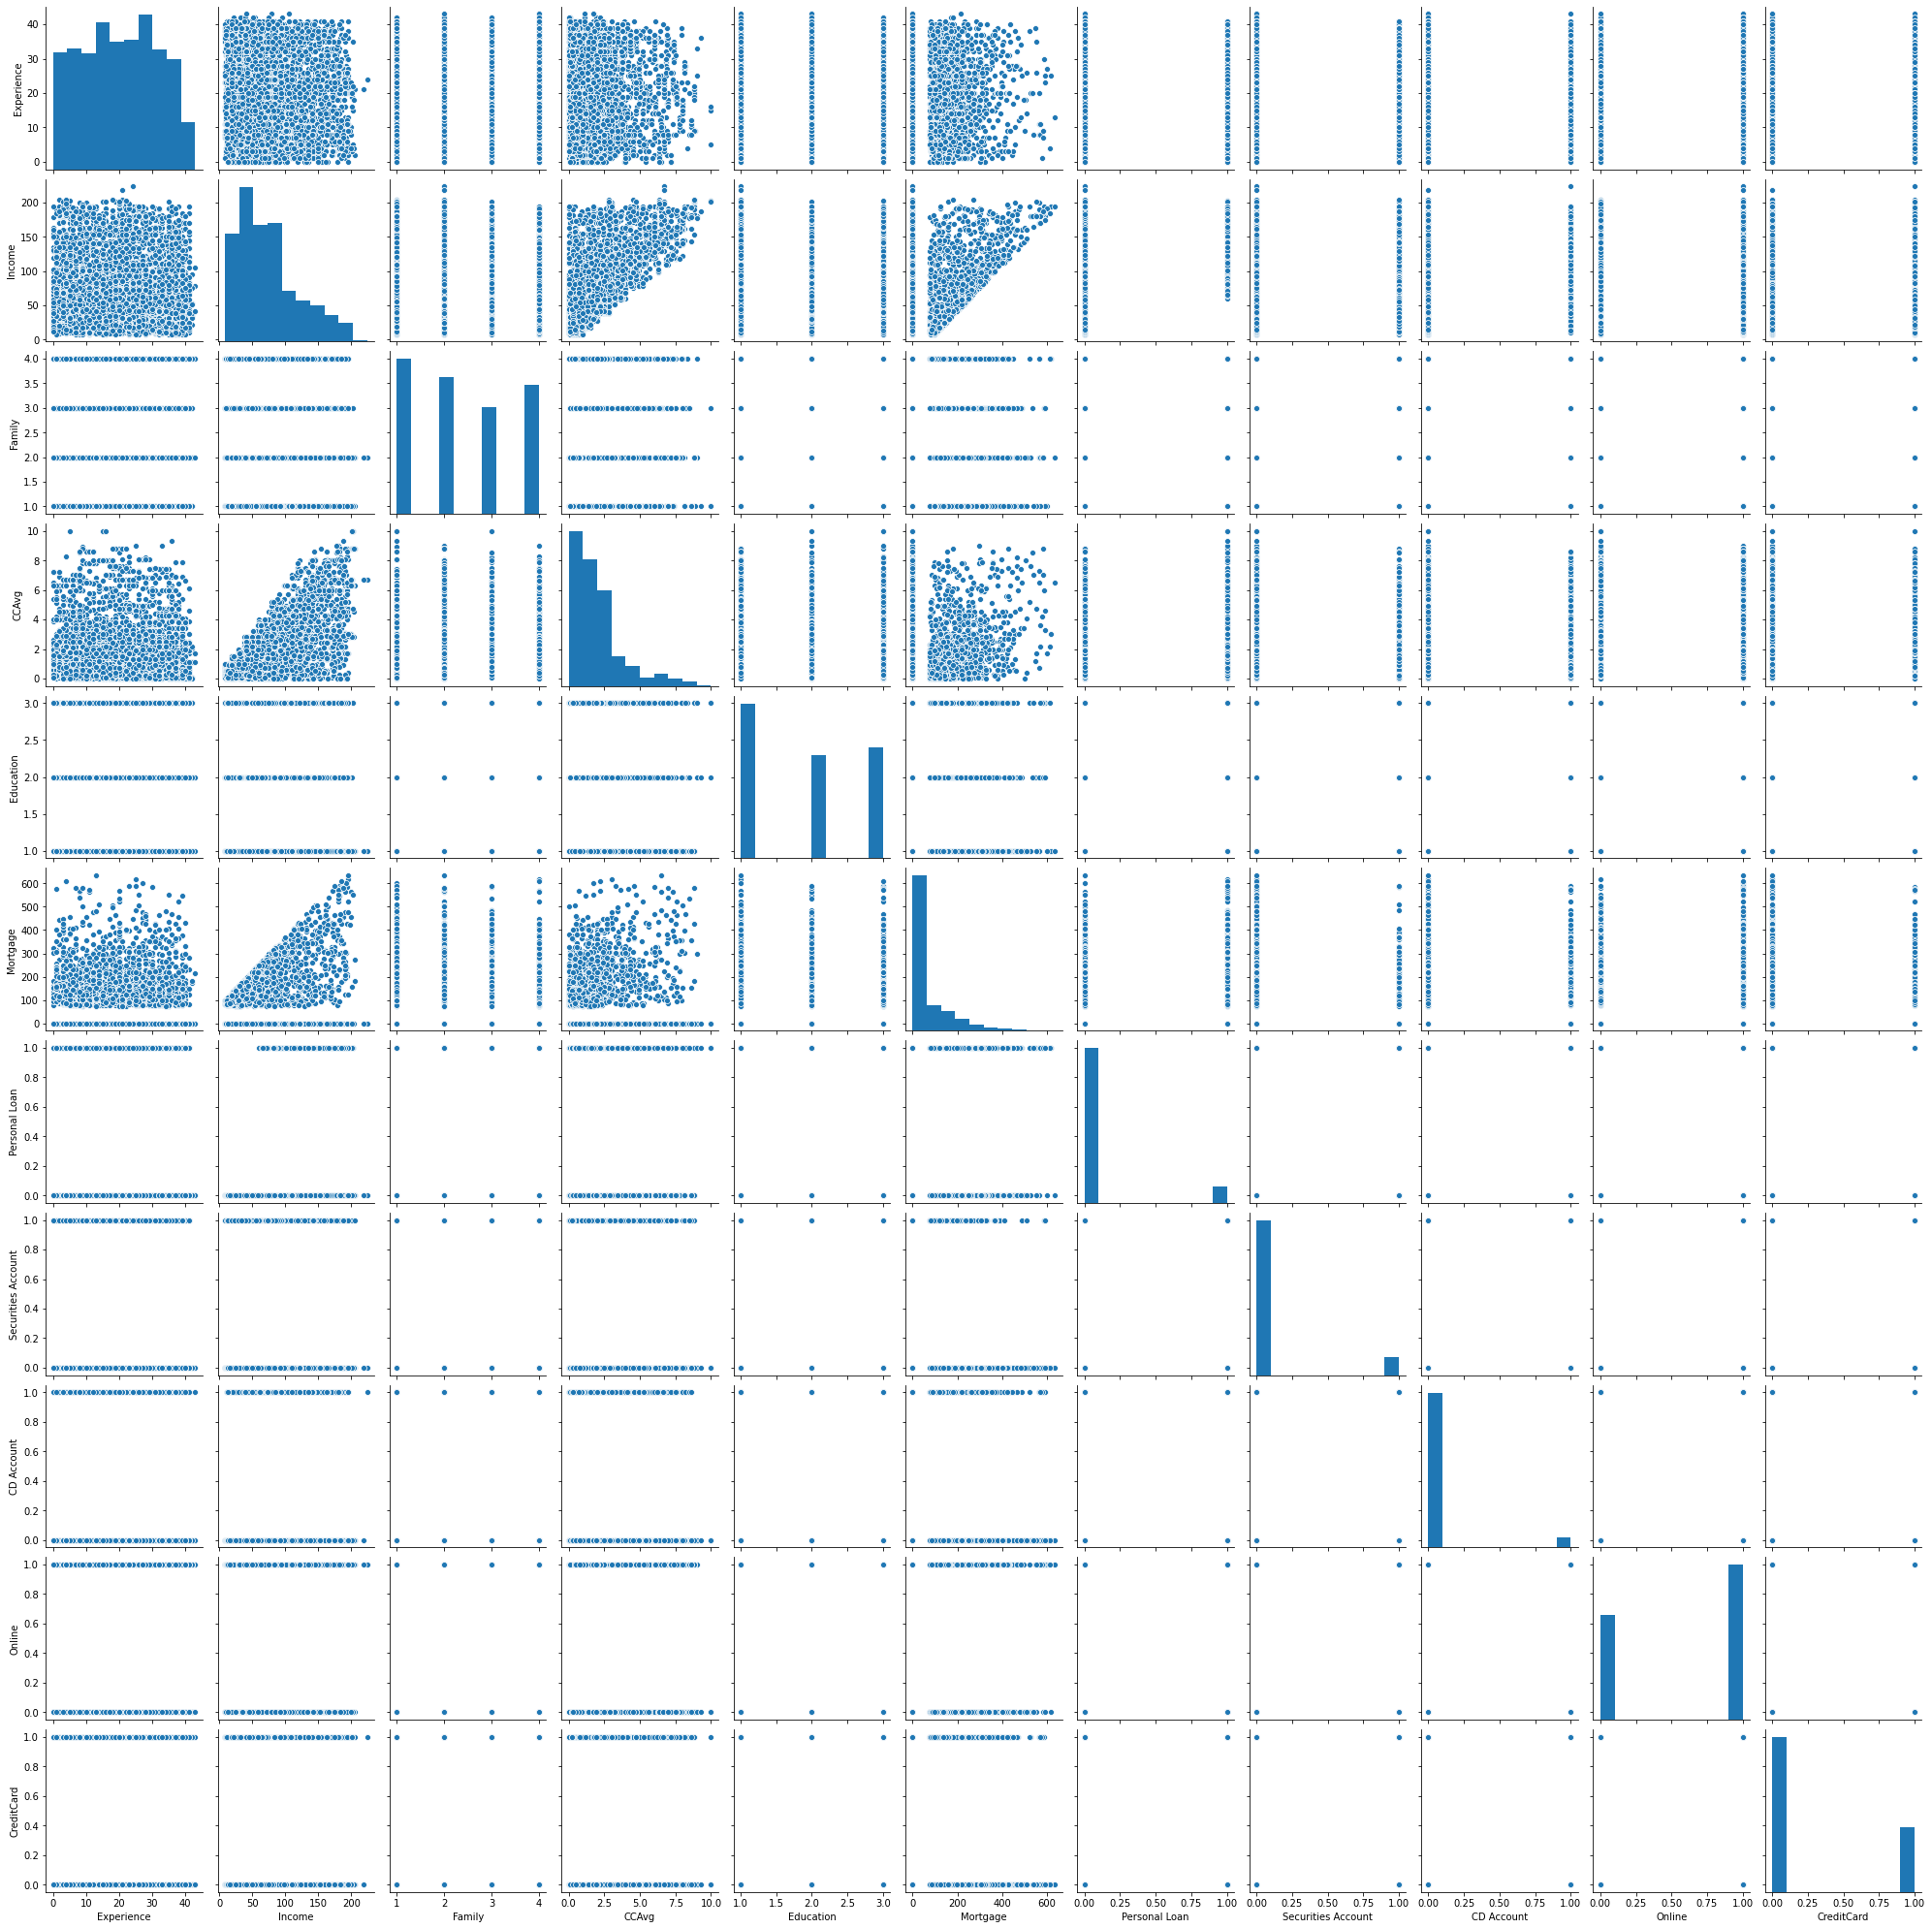

In [17]:
sns.pairplot(df.iloc[:,1:])

# Number of people with zero mortgage

In [18]:

print("no of people with zero mortgage")
#zero_mortgage.value_counts()
df['Mortgage'].isin([0]).sum()

no of people with zero mortgage


3462

# Number of people with zero credit card spending for month


In [19]:
print("no of people with zero credit card usage for one month")
df['CCAvg'].isin([0]).sum()

no of people with zero credit card usage for one month


106

# VALUE COUNTS OF ALL CATEGORICAL COLUMNS.


In [20]:
df.dtypes

Age                     int64
Experience            float64
Income                  int64
Family                  int64
CCAvg                 float64
Education               int64
Mortgage                int64
Personal Loan           int64
Securities Account      int64
CD Account              int64
Online                  int64
CreditCard              int64
dtype: object

In [21]:
#categorical variables value counts
df.Family.value_counts()

1    1472
2    1296
4    1222
3    1010
Name: Family, dtype: int64

In [22]:
df.Education.value_counts()

1    2096
3    1501
2    1403
Name: Education, dtype: int64

In [23]:
df['Securities Account'].value_counts()

0    4478
1     522
Name: Securities Account, dtype: int64

In [24]:
df['CD Account'].value_counts()

0    4698
1     302
Name: CD Account, dtype: int64

In [25]:
df['CreditCard'].value_counts()

0    3530
1    1470
Name: CreditCard, dtype: int64

In [26]:
df['Online'].value_counts()

1    2984
0    2016
Name: Online, dtype: int64

# UNIVARIENT ANALYSIS

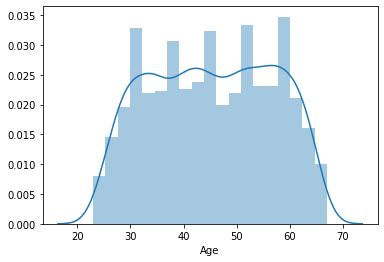

In [27]:
sns.distplot(df.Age)

age shows like symmetrical distrubution*

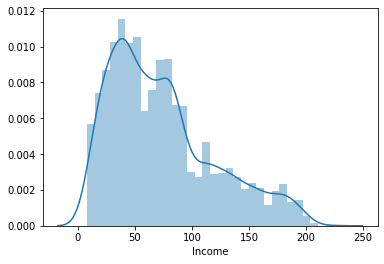

In [28]:
sns.distplot(df.Income)

the above curve i.e INCOME curve is seems to be RIGHT SKEWED distrubution

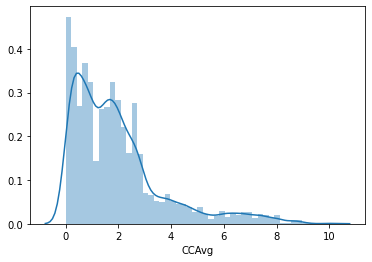

In [29]:
sns.distplot(df.CCAvg)

he above curve i.e CREDIT CARD AVERAGE curve is seems to be RIGHT SKEWED distrubution

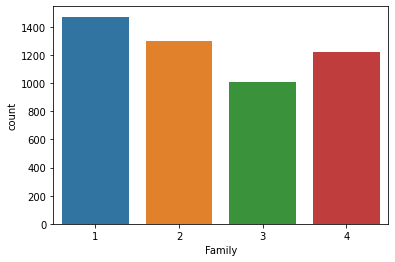

In [30]:
sns.countplot(df.Family)

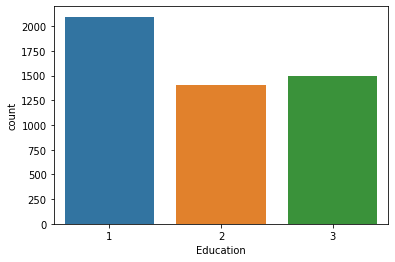

In [31]:
sns.countplot(df.Education)

# MULTIVARIENT ANALYSIS

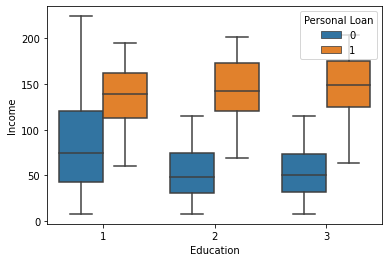

In [32]:
sns.boxplot(x='Education',y='Income',hue='Personal Loan',data=df);

 It seems the customers whose education level is 1 is having more income. However customers who has taken the personal loan have the same income levels

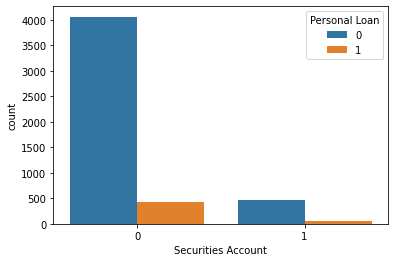

In [33]:
sns.countplot(x='Securities Account',data=df,hue='Personal Loan');

majority of people having security account doesnt have loan

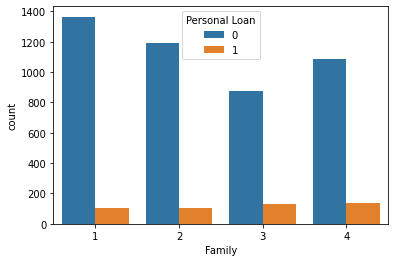

In [34]:
sns.countplot(x='Family',data=df,hue='Personal Loan')

: Family size does not have any impact in personal loan. But it seems families with size of 3 are more likely to take loan. When considering future campaign this might be good association.

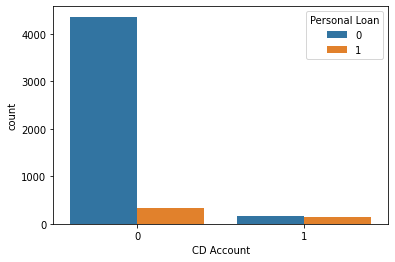

In [35]:
sns.countplot(x='CD Account',data=df,hue='Personal Loan')

Customers who does not have CD account , does not have loan as well. This seems to be majority. But almost all customers who has CD account has loan as well



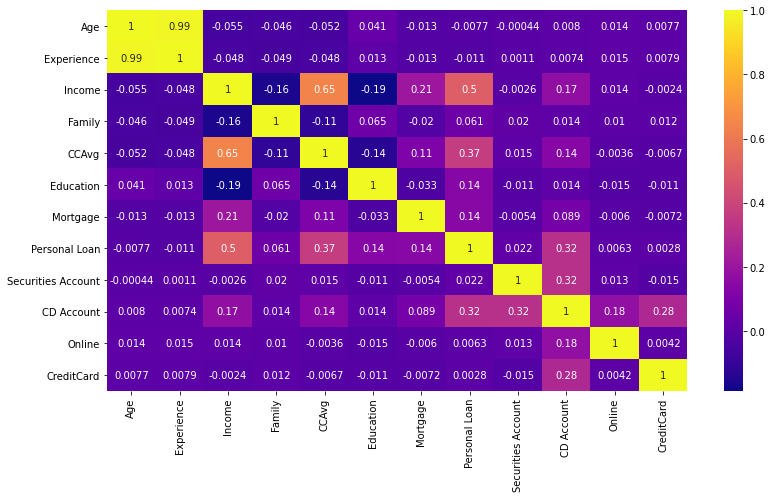

In [36]:

import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(13,7))
sns.heatmap(df.corr(),cmap='plasma',annot=True);

Income and CCAvg is moderately correlated.
Age and Experience is highly correlated

# step 4) applying transformations for necessary featured variables.

as we have seen that CC avg and income distrubutions are right skewed we apply power transformations.

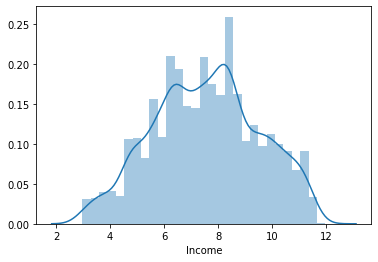

In [37]:
from sklearn.preprocessing import PowerTransformer
pt=PowerTransformer(method='yeo-johnson',standardize=False)
pt.fit(df["Income"].values.reshape(-1,1))
df['Income']=pt.transform(df["Income"].values.reshape(-1,1))
sns.distplot(df['Income'])

INCOME distrubution is uniform After applying Power Transformer

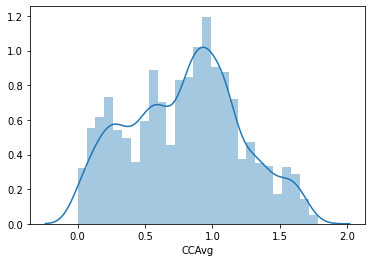

In [38]:
pt1=PowerTransformer(method='yeo-johnson',standardize=False)
pt1.fit(df["CCAvg"].values.reshape(-1,1))
df['CCAvg']=pt1.transform(df["CCAvg"].values.reshape(-1,1))
sns.distplot(df['CCAvg'])

the cc avg also seems to be uniform distrubution after transformation

as we can see mortgage have discontinuities we cant apply power transform method .but we apply binning to make it normalized.

In [39]:
df['Mortgage']=pd.cut(df["Mortgage"],
                      bins=[0,100,200,300,400,500,600,700],
                      labels=[0,1,2,3,4,5,6],
                      include_lowest=True)
#df.drop('Mortgage',axis=1,inplace=True)

In [40]:
df.head()

,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,25,1.0,6.827583,4,0.845160,1,0,0,1,0,0,0
1,45,19.0,5.876952,3,0.814478,1,0,0,1,0,0,0
2,39,15.0,3.504287,1,0.633777,1,0,0,0,0,0,0
3,35,9.0,8.983393,1,1.107427,2,0,0,0,0,0,0
4,35,8.0,6.597314,4,0.633777,2,0,0,0,0,0,1


PIe CHART of appiclants vs loan acceptance 

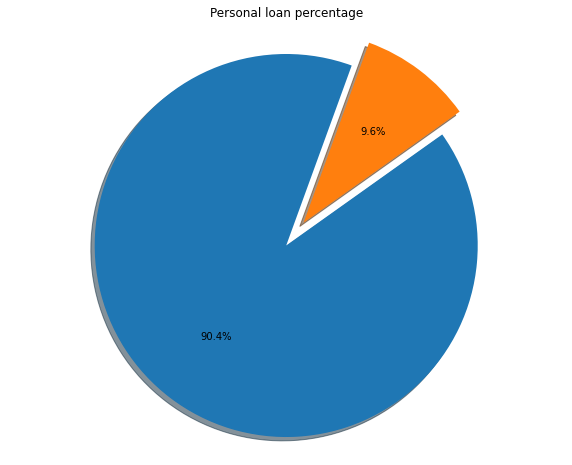

In [41]:
tempD=pd.DataFrame(df["Personal Loan"].value_counts()).reset_index()
tempD.columns=["Labels","Personal Loan"]
fig1,ax1=plt.subplots(figsize=(10,8))
explode=(0,0.15)
ax1.pie(tempD["Personal Loan"],explode=explode,autopct='%1.1f%%',shadow=True,startangle=70)
ax1.axis('equal')
plt.title("Personal loan percentage")
plt.show()


from above pie chart it seems only 9.6% of applicants got loans . so cant randomly split the data 70 % and 30% for training and testing.
so we use stratified sampling.

**Stratified sampling** is a common sampling technique used by researchers when trying to draw conclusions from different sub-groups or strata.
 each stratum would have the same sampling fraction.

# 5. Normalise your data and split the data into training and test set in the ratio of 70:30 respectively

In [43]:
from sklearn.model_selection import train_test_split
df_x=df[['Age','Income','Family','CCAvg','Education','Securities Account','CD Account','Online','CreditCard','Mortgage']]
df_y=df['Personal Loan']
train_X,test_X,train_Y,test_Y=train_test_split(df_x,df_y,test_size=0.3,stratify=df_y,random_state=100)


1.LOGISTIC REGRESSION

In [44]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,precision_score,f1_score,roc_auc_score,recall_score
import seaborn as sns
model = LogisticRegression()
model.fit(train_X,train_Y)

pr1_test_x=model.predict(test_X)
pr1_train_x=model.predict(train_X)
          

In [45]:
ac1_trainx=accuracy_score(train_Y,pr1_train_x)
ac1_testx=accuracy_score(test_Y,pr1_test_x)
print("training",ac1_trainx)
print("testing",ac1_testx)
print('recall score',recall_score(test_Y,pr1_test_x))
print("precision score",precision_score(test_Y,pr1_test_x))
print("F1_score",f1_score(test_Y,pr1_test_x))
print("rOC Auc dcore",roc_auc_score(test_Y,pr1_test_x))

training 0.9488571428571428
testing 0.9486666666666667
recall score 0.5555555555555556
precision score 0.8602150537634409
F1_score 0.6751054852320676
rOC Auc dcore 0.772984267453294


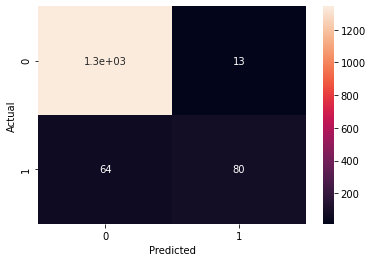

In [48]:
confusion_matrix = pd.crosstab(test_Y, pr1_test_x, rownames=['Actual'], colnames=['Predicted'])
sns.heatmap(confusion_matrix, annot=True)

## here actual true but predicted false count is 64

## Cross Validation is a very useful technique for assessing the effectiveness of your model, particularly in cases where you need to mitigate overfitting. It is also of use in determining the hyper parameters of your model, in the sense that which parameters will result in lowest test error.

In [49]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(model, train_X ,train_Y, cv=8)
print('Cross-Validation Accuracy Scores', scores)

Cross-Validation Accuracy Scores [0.93378995 0.96347032 0.96347032 0.9543379  0.93592677 0.94050343
 0.94508009 0.95423341]


# DESICION TREE CLASSIFIER

In [50]:
from sklearn.naive_bayes import GaussianNB
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

dt_model=DecisionTreeClassifier(criterion = 'entropy',max_depth=3)
dt_model.fit(train_X, train_Y)
pr2_test_x=dt_model.predict(test_X)
pr2_train_x=dt_model.predict(train_X)

In [51]:
y_predict = dt_model.predict(test_X)
y_predict[:5]

array([0, 0, 0, 0, 0])

In [52]:
ac2_trainx=accuracy_score(train_Y,pr2_train_x)
ac2_testx=accuracy_score(test_Y,pr2_test_x)
print("training",ac2_trainx)
print("testing",ac2_testx)
print('recall score',recall_score(test_Y,pr2_test_x))
print("precision score",precision_score(test_Y,pr2_test_x))
print("F1_score",f1_score(test_Y,pr2_test_x))
print("rOC Auc dcore",roc_auc_score(test_Y,pr2_test_x))

training 0.978
testing 0.984
recall score 0.8680555555555556
precision score 0.9615384615384616
F1_score 0.9124087591240877
rOC Auc dcore 0.9321841199606686


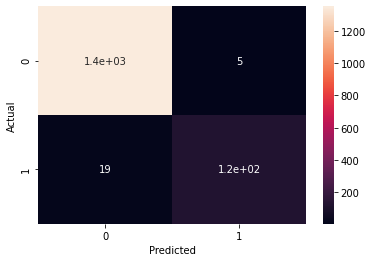

In [53]:
confusion_matrix1 = pd.crosstab(test_Y, y_predict, rownames=['Actual'], colnames=['Predicted'])
sns.heatmap(confusion_matrix1, annot=True)

## here actual true but predicted false count is 19

# NAVIES BAYES

In [54]:
from sklearn.naive_bayes import GaussianNB
naive_model = GaussianNB()
naive_model.fit(train_X, train_Y)
pr3_test_x=naive_model.predict(test_X)
pr3_train_x=naive_model.predict(train_X)




In [55]:
ac3_trainx=accuracy_score(train_Y,pr3_train_x)
ac3_testx=accuracy_score(test_Y,pr3_test_x)
print("training",ac3_trainx)
print("testing",ac3_testx)
print('recall score',recall_score(test_Y,pr3_test_x))
print("precision score",precision_score(test_Y,pr3_test_x))
print("F1_score",f1_score(test_Y,pr3_test_x))
print("rOC Auc dcore",roc_auc_score(test_Y,pr3_test_x))

training 0.9062857142857143
testing 0.9146666666666666
recall score 0.4930555555555556
precision score 0.5634920634920635
F1_score 0.5259259259259259
rOC Auc dcore 0.7262475417895771


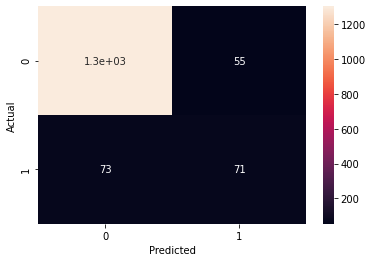

In [57]:
confusion_matrix2 = pd.crosstab(test_Y, pr3_test_x, rownames=['Actual'], colnames=['Predicted'])
sns.heatmap(confusion_matrix2, annot=True)

## here actual true but predicted false count is 73

# RANDOM FOREST

In [58]:
from sklearn.ensemble import RandomForestClassifier
randomforest_model = RandomForestClassifier(max_depth=2, random_state=0)
randomforest_model.fit(train_X, train_Y)
pr4_test_x=randomforest_model.predict(test_X)
pr4_train_x=randomforest_model.predict(train_X)

In [59]:
ac4_trainx=accuracy_score(train_Y,pr4_train_x)
ac4_testx=accuracy_score(test_Y,pr4_test_x)
print("training",ac4_trainx)
print("testing",ac4_testx)
print('recall score',recall_score(test_Y,pr4_test_x))
print("precision score",precision_score(test_Y,pr4_test_x))
print("F1_score",f1_score(test_Y,pr4_test_x))
print("rOC Auc dcore",roc_auc_score(test_Y,pr4_test_x))

training 0.922
testing 0.9173333333333333
recall score 0.1388888888888889
precision score 1.0
F1_score 0.24390243902439027
rOC Auc dcore 0.5694444444444444


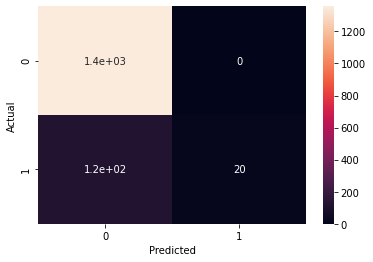

In [61]:
confusion_matrix3 = pd.crosstab(test_Y, pr4_test_x, rownames=['Actual'], colnames=['Predicted'])
sns.heatmap(confusion_matrix3, annot=True)

## here actual true but predicted false count is 122

# KNN

In [62]:
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn import model_selection
from sklearn.tree import DecisionTreeClassifier
knn=KNeighborsClassifier(n_neighbors= 21 , weights = 'uniform', metric='euclidean')
knn.fit(train_X,train_Y)
pr5_test_x=knn.predict(test_X)
pr5_train_x=knn.predict(train_X)

                       

In [63]:
ac5_trainx=accuracy_score(train_Y,pr5_train_x)
ac5_testx=accuracy_score(test_Y,pr5_test_x)
print("training",ac5_trainx)
print("testing",ac5_testx)
print('recall score',recall_score(test_Y,pr5_test_x))
print("precision score",precision_score(test_Y,pr5_test_x))
print("F1_score",f1_score(test_Y,pr5_test_x))
print("rOC Auc dcore",roc_auc_score(test_Y,pr5_test_x))

training 0.9374285714285714
testing 0.934
recall score 0.3194444444444444
precision score 0.9787234042553191
F1_score 0.481675392670157
rOC Auc dcore 0.6593534906588003


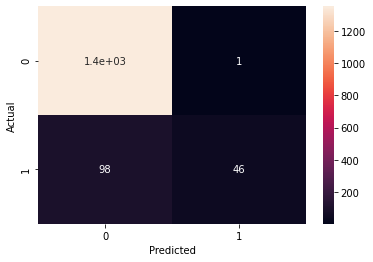

In [65]:
confusion_matrix4 = pd.crosstab(test_Y, pr5_test_x, rownames=['Actual'], colnames=['Predicted'])
sns.heatmap(confusion_matrix4, annot=True)

## here actual true but predicted false count is 98

MODELS COMPARISION

KNN: 0.955600 (0.008754)
DECISION TREE: 0.982200 (0.003736)
NAB: 0.910200 (0.008171)
RANDOMFRST: 0.986800 (0.003709)


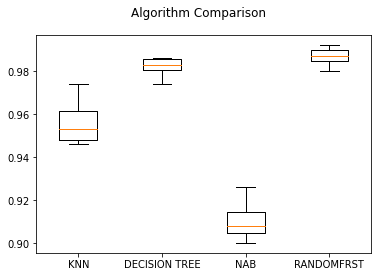

In [67]:
models = []
models.append(('KNN', KNeighborsClassifier()))
models.append(('DECISION TREE', DecisionTreeClassifier()))
models.append(('NAB', GaussianNB()))
models.append(('RANDOMFRST', RandomForestClassifier()))
X = np.array(df_x)
Y = np.array(df_y)
# evaluate each model in turn
results = []
names = []
scoring = 'accuracy'
for name, model in models:
	kfold = model_selection.KFold(n_splits=10, random_state=12345)
	cv_results = model_selection.cross_val_score(model, X, Y, cv=kfold, scoring=scoring)
	results.append(cv_results)
	names.append(name)
	msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
	print(msg)
# boxplot algorithm comparison
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

DECISION TREE GIVES BETTER RESULTS.

# BUISSNESS UNDERSTANDING MODEL:
  The bank has a growing customer base. The bank wants to increase borrowers (asset
customers) base to bring in more loan business and earn more through the interest on
loans. So , the bank wants to convert the liability based customers to personal loan
customers.

      
  Inorder to increase borrowers,I have buid a model of loan prediction using machine learning.in this model i used to predict wheather the customer gets loan or not using different algorithms.from the all algorithms i found that DECISION TREE gives more accuracy 98.4%. and  actual true but predicted false loans number from confusion matrix is also low i.e 18.
  
   SO i suggest to use random forest algorithm to predict wheather the customer gets  loan or not.


INSIGHTS FROM THE POJECT:

---



# MODEL: logistic regression

   train acc:                  = 0.9488571428571428  
   test acc:                    =0.9486666666666667

   false predicted true value:   = 64

   recall score                 =0.5555555555555556
   
  precision score:            =0.8602150537634409

   roc score                    =0.772984267453294

   f1 score                     =0.6751054852320676





## 

---



# MODEL: DESICION TREE CLASSIFIER

   train acc:                    = 0.978 
   test acc:                    =0.984

   false predicted true value:  = 19


   recallscore                  = 0.8680555555555556
   
   precision score:             =0.9615384615384616

   roc score                    =0.9321841199606686

   f1 score                     =0.9124087591240877



   

# MODEL: RANDOM FOREST

   train acc:                  =  0.922 
   test acc:                    =0.9173333333333333

   false predicted true value:   = 122

   recall score                  =0.1388888888888889

   precision score:              = 1.0

   roc score                    =0.5694444444444444

   f1 score                     = 0.24390243902439027




# MODEL: NAVIES BAYES

   train acc:                  =0.9062857142857143 
   test acc:                    =0.9146666666666666

   false predicted true value:   = 73

   recall score                 =0.4930555555555556
   
   precision score:             = 0.5634920634920635

   roc score                    =0.726247541789577

   f1 score                     =0.5259259259259259





   training 0.9062857142857143
testing 0.9146666666666666
recall score 0.4930555555555556
precision score 0.5634920634920635
F1_score 0.5259259259259259
rOC Auc dcore 0.726247541789577

# MODEL: KNN

   train acc:                  = 0.9488571428571428  
   test acc:                    =0.9486666666666667

   false predicted true value:   = 88

   recall score                 =0.3194444444444444
   
   precision score:            =0.8602150537634409

   roc score                    =0.772984267453294

   f1 score                     =0.6751054852320676

FROM all the above insights i found that decision tree is best for loan prediction